In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import fnmatch
import os
import pandas as pd
import datetime


import datetime as dt
date_fmt ='%Y%m%d'

TICKER = 'GME'
MKTCAP = 72e6 # outstanding shares

In [2]:
def get_df(sdir, NAME, raw_x, TICKER ):
    '''
    This function iterates through RegSHO data over a data range and pulls rows for a TICKER and
    puts the data into a pandas data frame
    a row is as follows. The consolodated daily short data is in the CNMSyyyymmdd.txt file for every trade day
    
    Date|Symbol|ShortVolume|ShortExemptVolume|TotalVolume|Market
    
    '''
    xxx = []
    for shortdate in raw_x:
        #print(shortdate)
        for file in os.listdir(sdir):
            matchme = prefix+str(shortdate)+'*'
            if fnmatch.fnmatch(file, matchme):
                xxx.append(file)

    df = None            


    for filename in xxx:
        f = open(sdir+filename)
        try:
            fullfile = pd.read_csv(f,sep="|")
            if df is None:
                tickerrow = fullfile.loc[fullfile['Symbol'] == TICKER]
                df = tickerrow

            else:
                tickerrow = fullfile.loc[fullfile['Symbol'] == TICKER]
                df = df.append(tickerrow)
        except:
            print('failed: {}'.format(filename))
    return df

In [3]:
# Generate dates to pull logs with
# We need to convert the Date time to YYYYMMDD as that is the format
# dates here are max values that are available. The earliest data I have is 20190102
x = pd.date_range(start='20090101',end='20240101',freq='D').strftime('%Y%m%d')

# this is the location of where I downloaded the data. REPLACE this with where you have your data 
sdir =  '/home/pookie/git/shorts/shortvolume/shortdata/'

df_dict ={}
basenames = ['CNMS','FNQC','FNRA','FNSQ','FNYX']
#prefix = 'CNMSshvol' #  B,N,Q 
#prefix = 'FNQCshvol' #  B** 
#prefix = 'FNRAshvol' #  D
#prefix = 'FNSQshvol' #  Q**
#prefix = 'FNYXshvol' #  N**
for basename in basenames:
    
    print(basename)
    prefix = basename+'shvol'
    sdir =  '/home/pookie/git/shorts/shortvolume/shortdata/'+basename+'/'
    df = get_df(sdir, prefix, x, TICKER)
    df_dict[basename] = df

# might not work. It doesnt. 
#raw_x = df['Date']
#df_dt = [dt.datetime.strptime(str(i), date_fmt) for i in raw_x]



CNMS
FNQC
FNRA
FNSQ
failed: FNSQshvol20101122.txt
FNYX


In [4]:
df_dict
#plt.plot(df_dt, df_dict['FNRA'])

{'CNMS':           Date Symbol  ShortVolume  ShortExemptVolume  TotalVolume Market
 3033  20171229    GME     394889.0             6072.0     737033.0    Q,N
 2974  20180801    GME     237675.0             1000.0     467132.0    Q,N
 2990  20180802    GME     241347.0              300.0     402459.0    Q,N
 2993  20180803    GME     725987.0                0.0    1040830.0    Q,N
 2980  20180806    GME     508260.0                0.0     776460.0    Q,N
 ...        ...    ...          ...                ...          ...    ...
 4015  20211229    GME     405033.0             3181.0     938619.0  B,Q,N
 3992  20211230    GME     217906.0              329.0     634133.0  B,Q,N
 4000  20211231    GME     168673.0             4249.0     580237.0  B,Q,N
 4039  20220103    GME     178977.0             1848.0     511862.0  B,Q,N
 3950  20220104    GME     389661.0              511.0     685935.0  B,Q,N
 
 [865 rows x 6 columns],
 'FNQC':           Date Symbol  ShortVolume  ShortExemptVolume  T

CNMS 1
success
FNQC 2
success
FNRA 3
success
FNSQ 4
success
FNYX 5
success


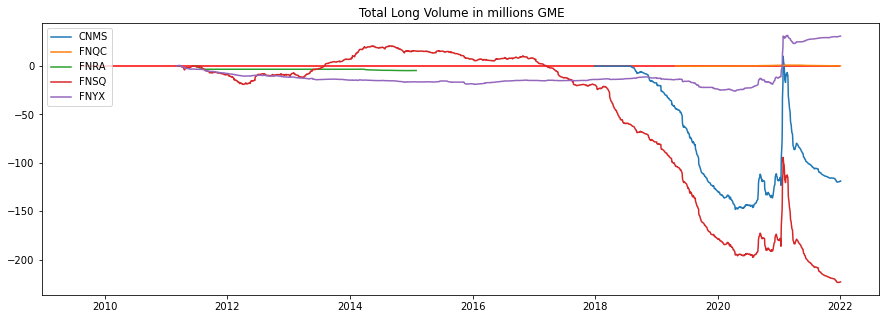

In [5]:
plt.figure(figsize=(15,5))

df_list = None
idx = 0 
for basename in basenames:
    idx = idx+1
    print(basename,idx)
    
    try:
        print('success')
        df_lv = None
        df = df_dict[basename]
        
        df_tv = df['TotalVolume']
        df_svn = df['ShortVolume']
        df_sve = df['ShortExemptVolume']
        df_sv = df_svn + df_sve
        df_lv = df_tv - 2*df_sv

        c_df_tv = np.cumsum(df_tv)
        c_df_sv = np.cumsum(df_sv)
        c_df_lv = np.cumsum(df_tv-2*df_sv)

        
        raw_x = df['Date']
        df_dt = [dt.datetime.strptime(str(i), date_fmt) for i in raw_x]

        
        if df_lv is None:
            print('None')
        
        plt.plot(df_dt,c_df_lv/1e6,label=basename)
    except:
        print('{}: fail'.format(basename))

plt.hlines(y=0, xmin=df_dt[0], xmax=df_dt[-1],color='r')

plt.title(' Total Long Volume in millions {}'.format(TICKER))
plt.legend()

In [9]:
df_dict

{'CNMS':           Date Symbol  ShortVolume  ShortExemptVolume  TotalVolume Market
 3033  20171229    GME     394889.0             6072.0     737033.0    Q,N
 2974  20180801    GME     237675.0             1000.0     467132.0    Q,N
 2990  20180802    GME     241347.0              300.0     402459.0    Q,N
 2993  20180803    GME     725987.0                0.0    1040830.0    Q,N
 2980  20180806    GME     508260.0                0.0     776460.0    Q,N
 ...        ...    ...          ...                ...          ...    ...
 4015  20211229    GME     405033.0             3181.0     938619.0  B,Q,N
 3992  20211230    GME     217906.0              329.0     634133.0  B,Q,N
 4000  20211231    GME     168673.0             4249.0     580237.0  B,Q,N
 4039  20220103    GME     178977.0             1848.0     511862.0  B,Q,N
 3950  20220104    GME     389661.0              511.0     685935.0  B,Q,N
 
 [865 rows x 6 columns],
 'FNQC':           Date Symbol  ShortVolume  ShortExemptVolume  T

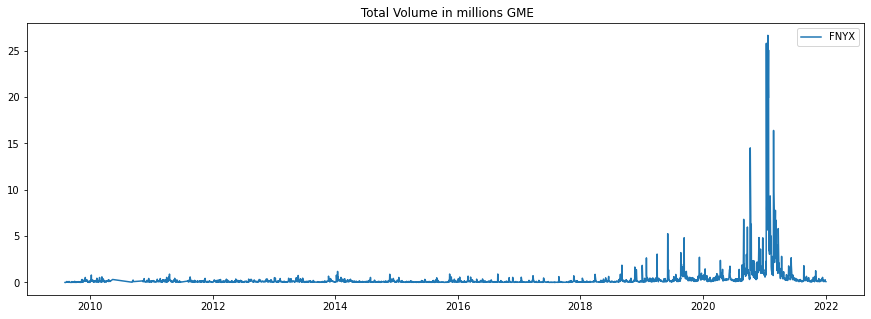

In [6]:
plt.figure(figsize=(15,5))

for basename in basenames:
    try:
        df = df_dict[basename]
        df_tv = df['TotalVolume']
        plt.plot(df_dt,df_tv/1e6,label=basename)
    except:
        pass

plt.title(' Total Volume in millions {}'.format(TICKER))
plt.legend() 

In [7]:
df_dict['CNMS']
df = df_dict['CNMS']
df_tv = df['TotalVolume']
df_svn = df['ShortVolume']
df_sve = df['ShortExemptVolume']
df_sv = df_svn + df_sve
df_lv = df_tv - 2*df_sv

c_df_tv = np.cumsum(df_tv)
c_df_sv = np.cumsum(df_sv)
c_df_lv = np.cumsum(df_tv-2*df_sv)

raw_x = df['Date']
df_dt = [dt.datetime.strptime(str(i), date_fmt) for i in raw_x]


In [17]:

def saver(dictex,sdir):
    for key, val in dictex.items():
        val.to_csv(sdir+"data_{}.csv".format(str(key)))

    with open(sdir+"keys.txt", "w") as f: #saving keys to file
        f.write(str(list(dictex.keys())))

def loader(sdir):
    """Reading data from keys"""
    with open(sdir+"keys.txt", "r") as f:
        keys = eval(f.read())

    dictex = {}    
    for key in keys:
        dictex[key] = pd.read_csv(sdir+"data_{}.csv".format(str(key)))

    return dictex


#dictex = loader()

In [18]:
saver(df_dict,'.')

In [19]:
df_loaded = loader('.')

In [22]:
df = df_loaded['CNMS']

In [28]:
df['NetShort'] = \
    df.TotalVolume - 2*(df.ShortExemptVolume + df.ShortVolume)

raw_x = df['Date']
df_dt = [dt.datetime.strptime(str(i), date_fmt) for i in raw_x]

import numpy as np
derp = np.cumsum(df.NetShort)


150

In [14]:
import yfinance as yf
TICK = yf.Ticker('GME').info
TOCK = yf.Ticker('TSLA').info
print(TICK['sharesOutstanding'])
print(TOCK['sharesOutstanding'])


76350800
1004259968


In [58]:
DetailedStockInfo = pd.DataFrame.from_dict(TICK,orient='index').T
df = pd.DataFrame.from_dict(TOCK, orient='index').T

In [55]:
derp = DetailedStockInfo['sharesOutstanding']

In [60]:
df.merge(DetailedStockInfo)

TypeError: unhashable type: 'list'

In [64]:
def saver(dictex,sdir):
    sdir = sdir+'/'
    for key, val in dictex.items():
        val.to_csv(sdir+"data_{}.csv".format(str(key)))

    with open(sdir+"keys.txt", "w") as f: #saving keys to file
        f.write(str(list(dictex.keys())))

def loader(sdir):
    """Reading data from keys"""
    with open(sdir+"keys.txt", "r") as f:
        keys = eval(f.read())

    dictex = {}
    for key in keys:
        dictex[key] = pd.read_csv(sdir+"data_{}.csv".format(str(key)))

    return dictex


In [66]:
saver(TICK,'.')

AttributeError: 'str' object has no attribute 'to_csv'

In [68]:
for key, val in TICK.items():
    print(key,val)

zip 76051
sector Consumer Cyclical
fullTimeEmployees 12000
longBusinessSummary GameStop Corp., a specialty retailer, provides games and entertainment products through its e-commerce properties and various stores in the United States, Canada, Australia, and Europe. The company sells new and pre-owned video game platforms; accessories, such as controllers, gaming headsets, virtual reality products, and memory cards; new and pre-owned video game software; and in-game digital currency, digital downloadable content, and full-game downloads, as well as network points cards, and prepaid digital and subscription cards. It also sells collectibles comprising licensed merchandise primarily related to the video game, television, and movie industries, as well as pop culture themes. The company operates its stores and e-commerce sites under the GameStop, EB Games, and Micromania brands; and collectibles stores under the Zing Pop Culture and ThinkGeek brand, as well as offers Game Informer, a print a

In [74]:
DetailedStockInfo  = None
symbol = 'GME'
print(symbol)
try:
    # download the stock price
    TICK = yf.Ticker(symbol).info
    DetailedStockInfo = DetailedStockInfo(TICK)
    print(DetailedStockInfo.head())
except Exception:
    print('Error {}'.format(symbol))

DetailedStockInfo
#DetailedStockInfo.to_csv(f, mode='a', header = True )

GME
Error GME


In [13]:
TICK = yf.Ticker(symbol).info


NameError: name 'yf' is not defined

In [78]:
df = pd.DataFrame(TICK)
df

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url


In [79]:
df = pd.DataFrame.from_dict(TOCK, orient='index').T

In [80]:
df

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url
0,78725,Consumer Cyclical,70757,"Tesla, Inc. designs, develops, manufactures, l...",Austin,650-681-5000,TX,United States,[],https://www.tesla.com,...,None,None,539.49,1090.81,False,None,1400,1170.34,1088.12,https://logo.clearbit.com/tesla.com


In [83]:
df.to_csv('notes/derp.csv')

In [84]:
pwd

'/home/pookie/git/shorts'

In [1]:
dt

NameError: name 'dt' is not defined

In [2]:
def saver(path, diction):
    print(path)
    for key in diction.keys():
        print(key)
    return

In [3]:
dict_t = {"a":1, 'B':2}

In [5]:
saver(22, dict_t)

22
a
B


In [11]:
import pandas as pd
pd.DataFrame.from_dict(dict_t)

ValueError: If using all scalar values, you must pass an index

In [15]:
df = pd.DataFrame.from_dict(TICK,orient='index').T


In [18]:
df.to_csv?